## Ejercicio Práctico: Regresión lineal simple (con 1 variable)

##### Ejemplo tomado de: Bagnato, Juan I (2020). Aprende machine learning Teoría + Práctica Python. Lean Publishing.

En este ejemplo cargaremos un archivo .csv de entrada obtenido por webscraping que contiene diversas URLs 
a artículos sobre Machine Learning de algunos sitios muy importantes como Techcrunch o KDnuggets y como 
características de entrada -las columnas- tendremos:
    
• Title: titulo del artículo

• url: ruta al artículo

• Word count: la cantidad de palabras del artículo,

• # of Links: los enlaces externos que contiene,

• # of comments: cantidad de comentarios,

• # Images video: suma de imágenes (o videos),

• Elapsed days: la cantidad de días transcurridos (al momento de crear el archivo)

• # Shares: nuestra columna de salida que será la “cantidad de veces que se compartió el artículo”.

A partir de las características de un artículo de machine learning intentaremos predecir, cuantas
veces será compartido en Redes Sociales. Haremos una primer predicción de regresión lineal simple -
con una sola variable predictora- para poder graficar en 2 dimensiones (ejes X e Y) y luego un ejemplo
de regresión Lineal Múltiple, en la que utilizaremos 3 dimensiones (X,Y,Z) y predicciones.

NOTA: el archivo .csv contiene mitad de datos reales, y otra mitad los generados de manera aleatoria,
por lo que las predicciones que obtendremos no serán reales.

### Paso 1: Importar las librerias

In [1]:
# Libreria para operaciones matemáticas o estadísticas
import numpy as np
# Libreria para el manejo de datos
import pandas as pd
# Librerías para gráficas
import seaborn as sb
import matplotlib.pyplot as plt
# Parámetros para generar las gráficas
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
# Libreria para el algoritmo de regresión lineal
from sklearn import linear_model
# Libreria para las métricas de regresión
from sklearn.metrics import mean_squared_error, r2_score

### Paso 2: Cargar los datos del archivo plano a un DataFrame

In [2]:
# Se cargan los datos de entrada
data = pd.read_csv("data/2.2-articulos_ml.csv")
# Se observa la cantidad de registros y columnas del archivo
data.shape

(161, 8)

In [3]:
# Se observan los primeros registros
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [4]:
# Se observan las estadísticas de los datos, para valores numéricos
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


Aqui vemos que la media de palabras en los artículos es de 1808. El artículo más corto tiene 250
palabras y el más extenso 8401. Intentaremos ver con nuestra relación lineal, si hay una correlación
entre la cantidad de palabras del texto y la cantidad de Shares obtenidos. Hacemos una visualización
en general de los datos de entrada:

/var/folders/0m/xmkg_d4s05j9zcbpwwncd19w0000gn/T/ipykernel_14704/1832561553.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(['Title','url','Elapsed days'], 1).hist()


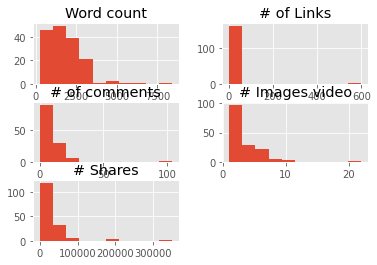

In [5]:
# Visualizo las características de la entrada en un histograma, sin las columnas: Title, url y Elapsed days
data.drop(['Title','url','Elapsed days'], 1).hist()
plt.show()

En estas gráficas vemos entre qué valores se concentran la mayoría de registros. Vamos a filtrar los
datos de cantidad de palabras para quedarnos con los registros con menos de 3500 palabras y también
con los que tengan Cantidad de compartidos menor a 80000.

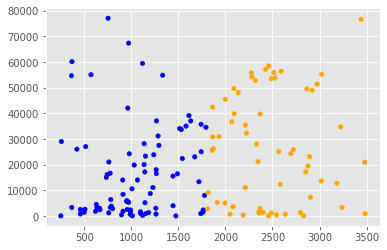

In [6]:
# Recorto los datos en la zona donde se encuentra la mayoría de lod puntos
# en el eje X: entre 0 y 3500
# en el eje Y: entre 0 y 80000
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

# Defino los colores para la gráfica
colores = ['orange', 'blue']
# Defino el tamaño de la gráfica
tamanio = [20,40]

# Traigo los valores de Word count
f1 = filtered_data['Word count'].values
# Traigo los valores de # Shares
f2 = filtered_data['# Shares'].values

# Se pintan los puntos con los colores definidos (por debajo y encina de la media de Word count)
asignar = []

for index, row in filtered_data.iterrows():
    if(row['Word count'] > 1808):
        # Asigno el color naranja
        asignar.append(colores[0])
    else:
        # Asigno el color azul
        asignar.append(colores[1])

# Genero la gráfica
plt.scatter(f1, f2, c=asignar, s=tamanio[0])
plt.show()

## Regresión lineal con SKLearn

Vamos a crear nuestros datos de entrada por el momento sólo Word Count y como etiquetas los #
Shares. Creamos el objeto LinearRegression y lo hacemos “encajar” (entrenar) con el método fit().
Finalmente imprimimos los coeficientes y puntajes obtenidos.

In [7]:
# Asigno la variable de entrada X para entrenamiento y las etiquetas Y
X_train = filtered_data[['Word count']].values
y_train = filtered_data[['# Shares']].values

# Se crea un objeto de regresión lineal
reg_lineal = linear_model.LinearRegression()

# Se entrena el modelo
reg_lineal.fit(X_train, y_train)

# Se hace las predicciones (linea en 2D)
y_pred = reg_lineal.predict(X_train)

# Se obtienen los coeficiones, según la Tangente
print('Coeficiente:', reg_lineal.coef_)
# Valor de la intercepción (valor donde corta el eje Y en X=0)
print('Intercepción:', reg_lineal.intercept_)
# Error cuadrático medio
print('Error Cuadrático Medio: %.2f' % mean_squared_error(y_train, y_pred))
# Puntaje de varianza, el mejor puntaje es un 1.0
print('Varianza: %.2f' % r2_score(y_train, y_pred))

Coeficiente: [[5.69765366]]
Intercepción: [11200.30322307]
Error Cuadrático Medio: 372888728.34
Varianza: 0.06


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente 5,69 y el término
independiente “b” es 11200. Tenemos un Error Cuadrático medio enorme, por lo que en realidad
este modelo no será muy bueno prediciendo. Pero estamos aprendiendo a usarlo, que es lo que nos
importa ahora. Esto también se ve reflejado en el puntaje de Varianza que debería ser cercano a
1.0.

### Visualizamos la recta que obtuvimos

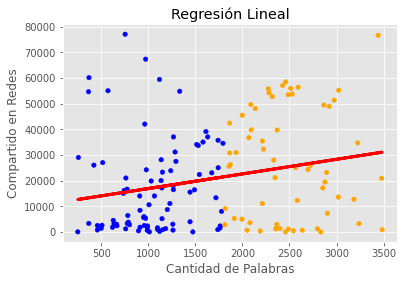

In [8]:

plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanio[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Palabras')
plt.ylabel('Compartido en Redes')
plt.title('Regresión Lineal')

plt.show()

## Predicción en regresión lineal simple

In [9]:
# Vamos a comprobar cúantos "Shares" se van a obtener por un artículo con 2000 palabras
# según el modelo hacemos:
y_Dosmil = reg_lineal.predict([[2000]])
print(int(y_Dosmil))

22595


Nos devuelve una predicción de 22595 “Shares” para un artículo de 2000 palabras.

## Regresión Lineal Múltiple (Múltiples Variables)

Vamos a extender el ejercicio utilizando más de una variable de entrada para el modelo. Esto le da
mayor poder al algoritmo de Machine Learning, pues de esta manera podremos obtener predicciones
más complejas. Nuestra “ecuación de la Recta”, ahora pasa a ser:
    
Y = b + m1 X1 + m2 X2 + … + m(n) X(n)

(y deja de ser una recta) En nuestro caso, utilizaremos 2 “variables predictivas” para poder
graficar en 3D, pero recordar que para mejores predicciones podemos utilizar más de 2 entradas y
prescindir del gráfico. Nuestra primer variable seguirá siendo la cantidad de palabras y la segunda
variable la crearemos artificialmente y será la suma de 3 columnas de entrada: la cantidad de
enlaces, comentarios y cantidad de imágenes. Vamos a programar!

In [10]:
#Vamos a intentar mejorar el Modelo, con una dimensión más: 
# Para poder graficar en 3D, haremos una variable nueva que será la suma de los enlaces, comentarios e imágenes
suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])

dataX2 =  pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values

Atención: Esta vez, nuestras dimensiones de entrenamiento serán X e Y y las etiquetas de predicción serán z.

In [11]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

# Los coeficientes
print('Coefficients:', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))


Coefficients: [   6.63216324 -483.40753769]
Mean squared error: 352122816.48
Variance score: 0.11


Como vemos, obtenemos 2 coeficientes (cada uno correspondiente a nuestras 2 variables predictivas),
pues ahora lo que graficamos no será una linea si no, un plano en 3 Dimensiones. El error obtenido
sigue siendo grande, aunque algo mejor que el anterior y el puntaje de Varianza mejora casi el doble
del anterior (aunque sigue siendo muy malo, muy lejos del 1).

## Visualizar un plano en 3D en Python

/var/folders/0m/xmkg_d4s05j9zcbpwwncd19w0000gn/T/ipykernel_14704/431655066.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

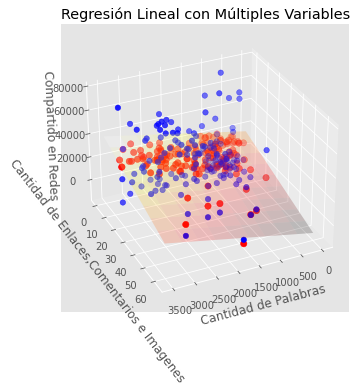

In [12]:
fig = plt.figure()
ax = Axes3D(fig)

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 

# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)

# Graficamos en rojo, los puntos que 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)

# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)
        
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')

### Predicción del modelo con múltiples variables

In [13]:
# Si quiero predecir cuántos "Shares" voy a obtener por un artículo con: 
# 2000 palabras y con enlaces: 10, comentarios: 4, imagenes: 6
# según nuestro modelo, hacemos:

z_Dosmil = regr2.predict([[2000, 10+4+6]])
print(int(z_Dosmil))

20518


Hemos visto cómo utilizar SKLearn en Python para crear modelos de Regresión Lineal con 1 o múltiples variables. 
En nuestro ejercicio no tuvimos una gran confianza en las predicciónes. Por ejemplo en nuestro primer modelo, con 2000 palabras nos predice que podemos tener 22595 pero el
margen de error haciendo raíz del error cuartico medio es más menos 19310. Es decir que escribiendo un artículo de 
2000 palabras lo mismo tenemos 3285 Shares que 41905. En este caso usamos este modelo para aprender a usarlo y habrá 
que ver en otros casos en los que sí nos brinde predicciones acertadas. Para mejorar nuestro modelo, deberíamos 
utilizar más dimensiones y encontrar datos de
entrada mejores.